In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel("C:\\Users\\oem\\datasets\\iris-dataset.xlsx", header = 0)

col_names = df.columns[0:4].tolist()

In [3]:
data = np.array(df, dtype=np.float32)

y_data = data[:, [-1]]

scaler = MinMaxScaler()
data1 = scaler.fit_transform(df.values)

x_data = data1[:, 0:-1]  


[0.84136038 0.11751808 0.03473561]


Text(0.5, 0, 'No of components')

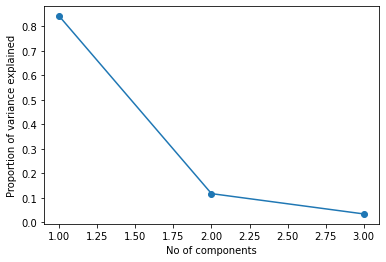

In [4]:
# scree plot

pca = PCA(n_components = 3)
pca.fit(x_data)
iris_pca = pca.transform(x_data)

PC_values = np.arange(pca.n_components_) + 1
print (pca.explained_variance_ratio_)

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-')
plt.ylabel('Proportion of variance explained')
plt.xlabel('No of components')

In [5]:
pca = PCA(n_components = 2)
pca.fit(x_data)
iris_pca = pca.transform(x_data)

pca_columns = ['PC_1', 'PC_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
print (pca.explained_variance_ratio_)
print (irisDF_pca)

[0.84136038 0.11751808]
         PC_1      PC_2
0   -0.630703  0.107578
1   -0.622905 -0.104260
2   -0.669520 -0.051417
3   -0.654153 -0.102885
4   -0.648788  0.133488
..        ...       ...
145  0.551462  0.059841
146  0.407146 -0.171821
147  0.447143  0.037560
148  0.488208  0.149678
149  0.312066 -0.031130

[150 rows x 2 columns]


In [6]:
irisDF_pca['target']=y_data
print (irisDF_pca)

         PC_1      PC_2  target
0   -0.630703  0.107578     0.0
1   -0.622905 -0.104260     0.0
2   -0.669520 -0.051417     0.0
3   -0.654153 -0.102885     0.0
4   -0.648788  0.133488     0.0
..        ...       ...     ...
145  0.551462  0.059841     2.0
146  0.407146 -0.171821     2.0
147  0.447143  0.037560     2.0
148  0.488208  0.149678     2.0
149  0.312066 -0.031130     2.0

[150 rows x 3 columns]


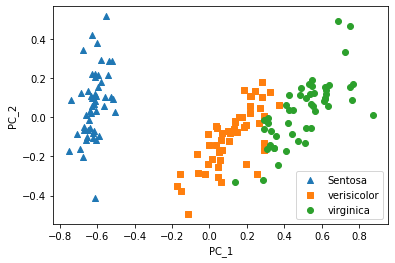

In [7]:
# scores plot

markers = ['^', 's', 'o']
target_names = ['Sentosa','verisicolor','virginica']

for i, marker in enumerate (markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['PC_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['PC_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = target_names[i])
    
plt.legend()
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.show()

In [8]:
print (pca.components_)

pca.components_[1]

[[ 0.42494212 -0.15074824  0.61626702  0.64568888]
 [ 0.42320271  0.90396711 -0.06038308 -0.00983925]]


array([ 0.42320271,  0.90396711, -0.06038308, -0.00983925])

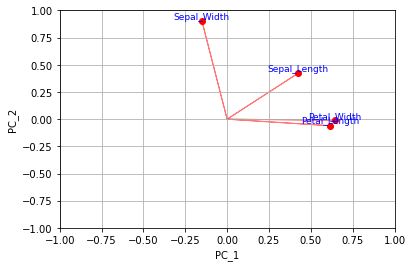

In [9]:
x = pca.components_[0]
y = pca.components_[1]
x_features = col_names

for i in range(4):
    plt.arrow(0, 0, x[i], y[i],color = 'r',alpha = 0.5)

    plt.xlim(-1,1)
    plt.ylim(-1,1)

plt.plot(x, y, 'ro')

for i, v in enumerate(x):
    plt.text(v, y[i], x_features[i],                 
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  
             verticalalignment='bottom')   

plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.grid()
plt.show()
